# Exploring the Heliosphere with Python: PyHC Summer School 2024

This notebook demonstrates loading and plotting science data in the Heliosphere using PySPEDAS and SunPy. It includes simple examples from 17 missions, as well as data from ground magnetometers and geomagnetic indices.

**By Jim Lewis, UC Berkeley Space Sciences Lab**

jwl(at)ssl.berkeley.edu

Last updated: April 16, 2024

Notes:
- I tried to start with the Sun, and go all the way to the ground; so solar data are first and ground data are last (with a short detour to Mars)
- For the most part, the data shown are from March 24, 2023;
- Only a few data products are loaded/plotted for each spacecraft in this notebook, so not all spacecraft/instruments/data products are demonstrated. For a list of the full capabilities, please see the documentation:

PySPEDAS: https://pyspedas.readthedocs.io/

SunPy: https://sunpy.org/

- The SunPy examples were taken from the SunPy examples gallery, with minor changes for our event
- Other Python in Heliophysics Community (PyHC) projects used in this notebook:

cdflib: https://cdflib.readthedocs.io/

PyTplot: https://pytplot.readthedocs.io/

Geopack: https://github.com/tsssss/geopack

HAPI client: https://github.com/hapi-server/client-python

>[Exploring the Heliosphere with Python](#scrollTo=7of2f7In4ju9)

>>[Solar and Heliospheric Observatory satellite (SOHO)](#scrollTo=63VP0tdm7sr5)

>>[Solar Dynamics Observatory (SDO)](#scrollTo=LBbTEsRU8iJP)

>>[Parker Solar Probe](#scrollTo=YI5IRRJTIgoh)

>>[Solar Orbiter](#scrollTo=dOmstkoqI6G0)

>>[Advanced Composition Explorer (ACE)](#scrollTo=repQs8PglYkK)

>>[Deep Space Climate Observatory (DSCOVR)](#scrollTo=uNUdKsUhkzL7)

>>[Solar Terrestrial Relations Observatory (STEREO)](#scrollTo=r-7y4swZcPan)

>>[Mars Atmosphere and Volatile Evolution (MAVEN)](#scrollTo=GsHDJoLzlzlc)

>>[OMNI](#scrollTo=P8o9_s4NlpUJ)

>>[Kyoto Dst](#scrollTo=kvwReQcYoTga)

>>[Geotail](#scrollTo=3aKOINyJbquI)

>>[Magnetospheric Multiscale (MMS)](#scrollTo=KCUfQYIElyri)

>>[Cluster](#scrollTo=EcsRGbTs3Mfd)

>>[Time History of Events and Macroscale Interactions during Substorms (THEMIS)](#scrollTo=Fz40PKL4cGQF)

>>[Van Allen Probes (formerly RBSP)](#scrollTo=DDlc_B52b5Sf)

>>[Arase](#scrollTo=5mR0VVLcmQtv)

>>[Geopack (Tsyganenko field models)](#scrollTo=hgmYsl5IzQ7N)

>>[Two Wide-Angle Imaging Neutral-Atom Spectrometers (TWINS)](#scrollTo=PAY8dDZImU1N)

>>[Polar Operational Environmental Satellites (POES)](#scrollTo=nWCmey5BmYRu)

>>[Swarm](#scrollTo=85RU5QRK4CKY)

>>[Spherical Elementary Currents (SECS)](#scrollTo=IwQmONDMn14b)

>>[Equivalent Ionospheric Currents (EICS)](#scrollTo=WyuIzxA_oEDq)

>>[All Sky Imager data](#scrollTo=cS5ZJ8DQocJQ)

>>[Ground magnetometer data](#scrollTo=YupmshpcoX-l)

>>[Magnetic Induction Coil Array (MICA)](#scrollTo=BeVmdYo4oe5U)

>>[Resources](#scrollTo=CJRw4BVBMVIP)

>>>[PyTplot Basics](#scrollTo=CJRw4BVBMVIP)

>>>[Loading Data](#scrollTo=CJRw4BVBMVIP)

>>>[Plotting Data](#scrollTo=CJRw4BVBMVIP)

>>>[Dates and Times](#scrollTo=CJRw4BVBMVIP)

>>>[Coordinate Transformations](#scrollTo=CJRw4BVBMVIP)

>>>[Analysis](#scrollTo=CJRw4BVBMVIP)

>>>[Documentation](#scrollTo=CJRw4BVBMVIP)



Install PySPEDAS and all its required dependencies: This is needed in Google Colab, but if you already have pyspedas installed, you can skip it or comment it out.

In [2]:
!pip install pyspedas


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


Install sunpy and some related packages needed for SOHO example:  These are not installed by default with pyspedas, so unless you've installed them already, you probably need this.

In [3]:
!pip install sunpy
!pip install zeep
!pip install drms


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


Install basemap package (needed for SECS and EICS examples):  Again, this is not installed by default with pyspedas, so you may need this.

In [4]:
!pip install basemap


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


Restart the session to pick up any newly installed packages:

In [5]:
exit()

In [1]:
trange = ['2023-03-24', '2023-03-25']

## Solar and Heliospheric Observatory satellite (SOHO) <a class="anchor" id="soho"></a>

The joint NASA-ESA [Solar & Heliospheric Observatory](https://www.nasa.gov/mission_pages/soho/index.html) mission -- SOHO -- was designed to study the Sun inside out, from its internal structure, to the extensive outer atmosphere, to the solar wind that it blows across the solar system. 


Create a figure of LASCO C2 data

In [2]:
import os

import matplotlib.pyplot as plt

import astropy.time
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.visualization import ImageNormalize, SqrtStretch

import sunpy.map
from sunpy.net import Fido
from sunpy.net import attrs as a

timerange = a.Time('2023/03/24 06:00', '2023/03/24 06:01')
instrument = a.Instrument.lasco
detector = a.Detector.c2
result = Fido.search(timerange, instrument, detector)
downloaded_files = Fido.fetch(result)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

2024-04-16 23:15:06 - sunpy - INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere.
For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,dsun_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crlt_obs,dsun_obs,crln_obs
 [sunpy.map.mapbase]
2024-04-16 23:15:06 - sunpy - WARNING: SunpyMetadataWarning: Missing metadata for observer: assuming Earth-based observer.
For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,dsun_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crlt_obs,dsun_obs,crln_obs



INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


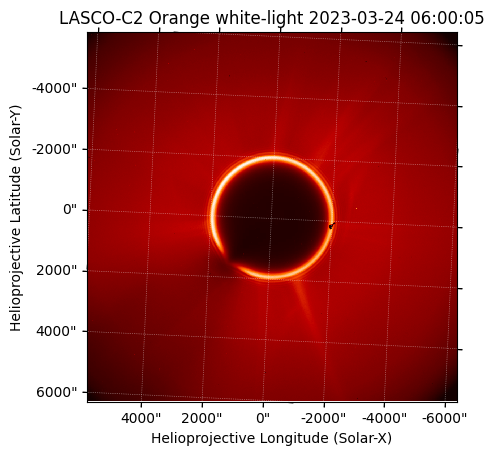

In [3]:
lascomap = sunpy.map.Map(downloaded_files[0])
fig = plt.figure()
lascomap.plot()

plt.show()

Load the CELIAS data

In [4]:
import pyspedas

pyspedas.soho.celias(trange=['2023-03-24', '2023-03-25'])

16-Apr-24 23:15:10: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/soho/celias/pm_5min/2023/
16-Apr-24 23:15:10: File is current: soho_data/celias/pm_5min/2023/soho_celias-pm_5min_20230324_v02.cdf


['V_p',
 'N_p',
 'Vth_p',
 'NS_angle',
 'V_He',
 'CRN',
 'GSE_POS',
 'HC_RANGE',
 'HG_LAT',
 'HG_LONG']

Plot the proton velocity, density and SOHO spacecaft position in GSE coordinates, as a function of time:



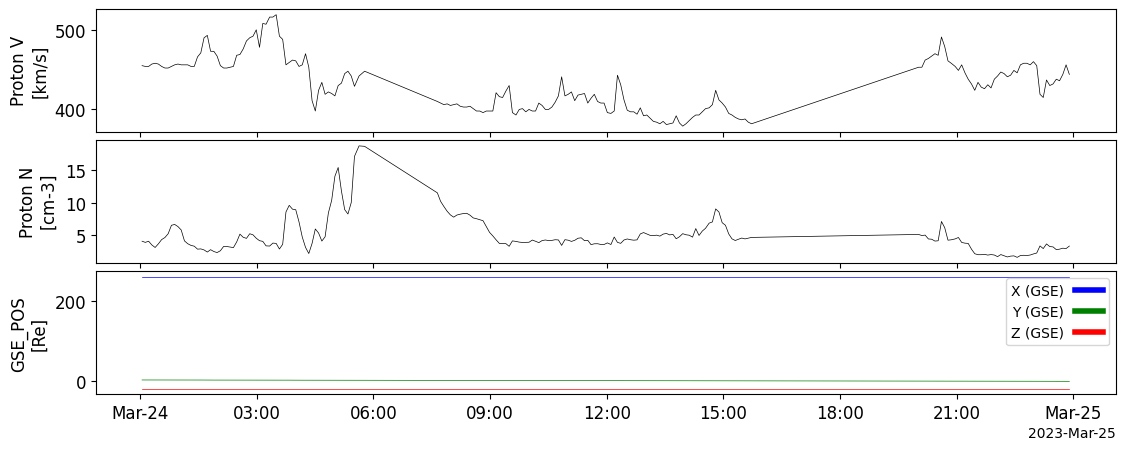

In [5]:
from pytplot import tplot

tplot(['V_p', 'N_p', 'GSE_POS'])

Load the COSTEP data:

In [6]:
pyspedas.soho.costep(trange=['2023-03-24', '2023-03-25'], time_clip=True, datatype='ephin_l3i-1min')

16-Apr-24 23:15:14: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/soho/costep/ephin_l3i-1min/2023/
16-Apr-24 23:15:15: File is current: soho_data/costep/ephin_l3i-1min/2023/soho_costep-ephin_l3i-1min_20230101_v01.23.cdf


['status',
 'accum_time',
 'P_int',
 'P_sys',
 'P_stat',
 'He_int',
 'He_sys',
 'He_stat']

Plot the COSTEP proton intensity:

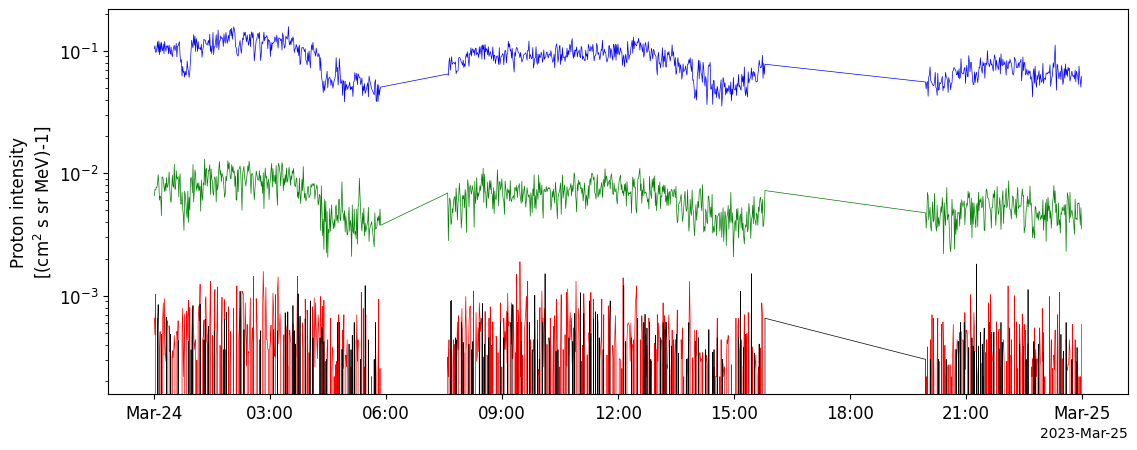

In [7]:
tplot('P_int')

In [8]:
pyspedas.soho.erne(trange=trange)

16-Apr-24 23:15:34: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/soho/erne/hed_l2-1min/2023/
16-Apr-24 23:15:35: File is current: soho_data/erne/hed_l2-1min/2023/soho_erne-hed_l2-1min_20230324_v01.cdf


['est', 'PH', 'AH', 'PHC', 'AHC']

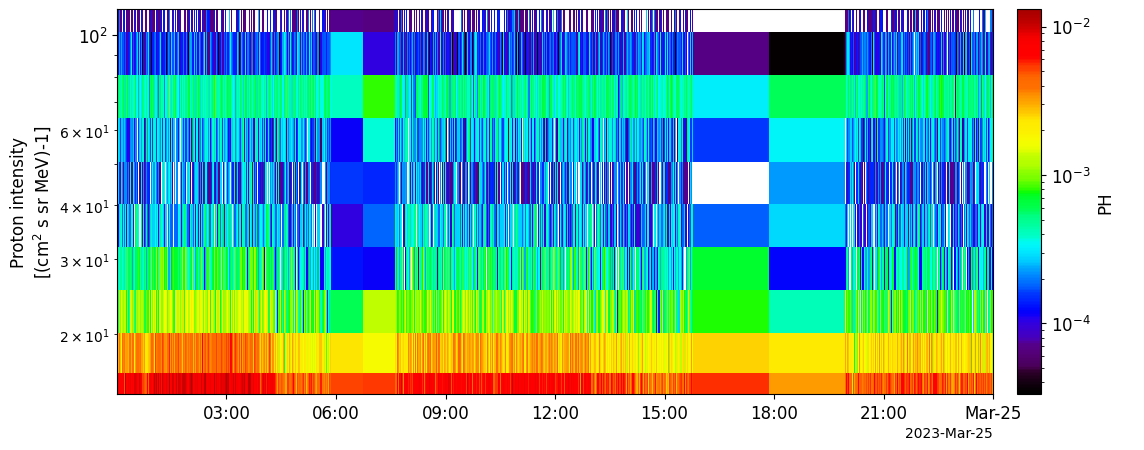

In [9]:
from pytplot import options

options('PH', 'spec', True)
options('PH', 'ylog', True)
options('PH', 'zlog', True)

tplot(['PH'])

## Parker Solar Probe

NASA's [Parker Solar Probe](https://www.nasa.gov/content/goddard/parker-solar-probe-humanity-s-first-visit-to-a-star) mission is revolutionizing our understanding of the Sun, where changing conditions can propagate out into the solar system, affecting Earth and other worlds. Parker Solar Probe travels through the Sun’s atmosphere, closer to the surface than any spacecraft before it, facing brutal heat and radiation conditions to provide humanity with the closest-ever observations of a star.

Load and plot PSP FIELDS data (note: this example came from the team's IDL crib sheet):

In [10]:
time_range = ['2023-03-24', '2023-03-24/12:00']

pyspedas.psp.fields(datatype='mag_rtn_4_sa_per_cyc',
                    trange=time_range,
                    time_clip=True)
pyspedas.psp.fields(datatype='rfs_hfr',
                    varnames='psp_fld_l2_rfs_hfr_auto_averages_ch0_V1V2',
                    trange=time_range,
                    time_clip=True)
pyspedas.psp.fields(datatype='rfs_lfr',
                    varnames='psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2',
                    trange=time_range,
                    time_clip=True)

16-Apr-24 23:15:39: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn_4_per_cycle/2023/
16-Apr-24 23:15:39: File is current: psp_data/fields/l2/mag_rtn_4_per_cycle/2023/psp_fld_l2_mag_rtn_4_sa_per_cyc_20230324_v02.cdf
16-Apr-24 23:15:40: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn_4_per_cycle/2023/
16-Apr-24 23:15:40: File is current: psp_data/fields/l2/mag_rtn_4_per_cycle/2023/psp_fld_l2_mag_rtn_4_sa_per_cyc_20230324_v02.cdf
16-Apr-24 23:15:40: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/rfs_hfr/2023/
16-Apr-24 23:15:41: File is current: psp_data/fields/l2/rfs_hfr/2023/psp_fld_l2_rfs_hfr_20230324_v03.cdf
16-Apr-24 23:15:41: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/rfs_hfr/2023/
16-Apr-24 23:15:41: File is current: psp_data/fields/l2/rfs_hfr/2023/psp_fld_l2_rfs_hfr_20230324_v03.cdf
16-Apr-24 23:15:41: Downloading remote index: https://spdf.gsfc.na

['psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2', 'psp_fld_l2_quality_flags']

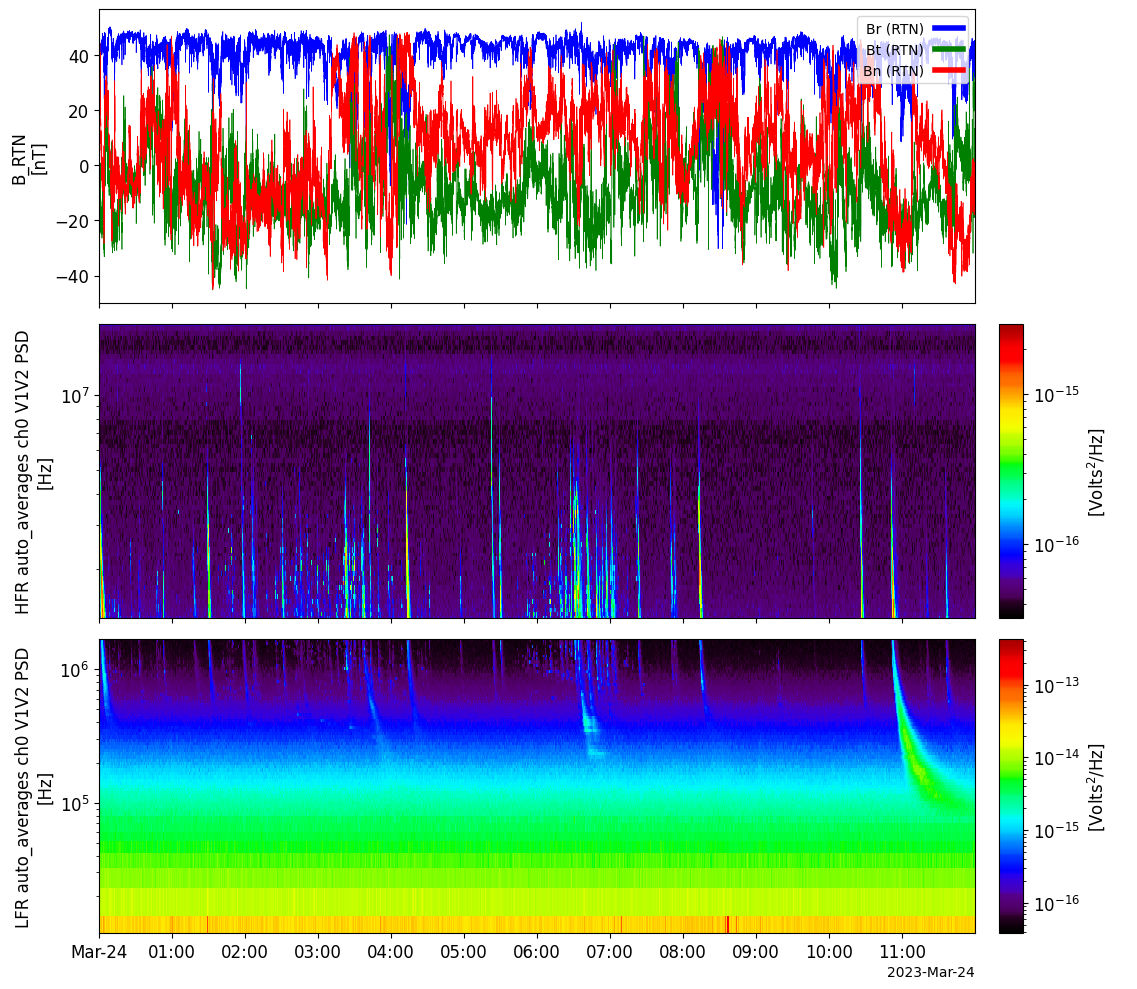

In [11]:
from pytplot import tplot, options

options('psp_fld_l2_rfs_hfr_auto_averages_ch0_V1V2', 'ylog', True)
options('psp_fld_l2_rfs_hfr_auto_averages_ch0_V1V2', 'zlog', True)
options('psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2', 'ylog', True)
options('psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2', 'zlog', True)

tplot(['psp_fld_l2_mag_RTN_4_Sa_per_Cyc',
       'psp_fld_l2_rfs_hfr_auto_averages_ch0_V1V2',
       'psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2'], ysize=12)

## Solar Orbiter

[Solar Orbiter](https://www.nasa.gov/content/solar-orbiter-science) is a space mission of international collaboration between ESA and NASA to study the Sun, its outer atmosphere and what drives the constant outflow of solar wind that affects Earth. 

In [12]:
pyspedas.solo.mag(trange=['2023-03-22', '2023-03-25'])


16-Apr-24 23:15:59: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/solar-orbiter/mag/science/l2/rtn-normal/2023/
16-Apr-24 23:16:00: File is current: solar_orbiter_data/mag/science/l2/rtn-normal/2023/solo_l2_mag-rtn-normal_20230322_v01.cdf
16-Apr-24 23:16:00: No links matching pattern solo_l2_mag-rtn-normal_20230323_v??.cdf found at remote index https://spdf.gsfc.nasa.gov/pub/data/solar-orbiter/mag/science/l2/rtn-normal/2023/
16-Apr-24 23:16:00: No links matching pattern solo_l2_mag-rtn-normal_20230324_v??.cdf found at remote index https://spdf.gsfc.nasa.gov/pub/data/solar-orbiter/mag/science/l2/rtn-normal/2023/


['B_RTN']

In [13]:
pyspedas.solo.swa(trange=['2023-03-22', '2023-03-25'], datatype='pas-eflux')

16-Apr-24 23:16:01: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/solar-orbiter/swa/science/l2/pas-eflux/2023/
16-Apr-24 23:16:02: File is current: solar_orbiter_data/swa/science/l2/pas-eflux/2023/solo_l2_swa-pas-eflux_20230322_v02.cdf
16-Apr-24 23:16:02: File is current: solar_orbiter_data/swa/science/l2/pas-eflux/2023/solo_l2_swa-pas-eflux_20230323_v02.cdf
16-Apr-24 23:16:02: No links matching pattern solo_l2_swa-pas-eflux_20230324_v??.cdf found at remote index https://spdf.gsfc.nasa.gov/pub/data/solar-orbiter/swa/science/l2/pas-eflux/2023/


['unrecovered_count', 'total_count', 'quality_factor', 'eflux']

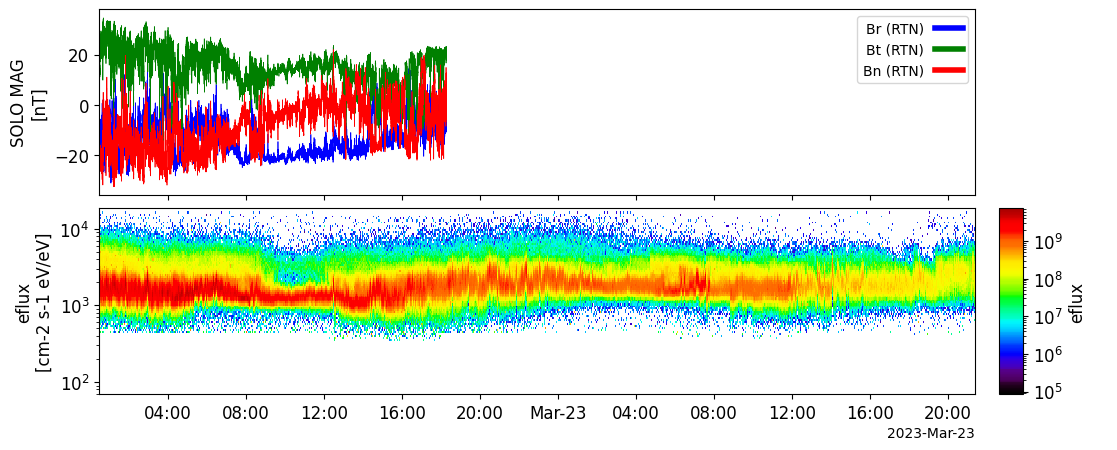

In [14]:
tplot(['B_RTN', 'eflux'])

## Advanced Composition Explorer (ACE)

The [Advanced Composition Explorer](https://www.nasa.gov/ace), or ACE, observes and measures magnetic fields and particles in space, from a vantage point approximately 1/100 of the distance from Earth to the Sun.

In [15]:
mfi_vars = pyspedas.ace.mfi(trange=trange)


16-Apr-24 23:16:23: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/ace/mag/level_2_cdaweb/mfi_h3/2023/
16-Apr-24 23:16:23: File is current: ace_data/mag/level_2_cdaweb/mfi_h3/2023/ac_h3_mfi_20230324_v03.cdf
16-Apr-24 23:16:24: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/ace/swepam/level_2_cdaweb/swe_h0/2023/
16-Apr-24 23:16:24: Remote index not found: https://spdf.gsfc.nasa.gov/pub/data/ace/swepam/level_2_cdaweb/swe_h0/2023/


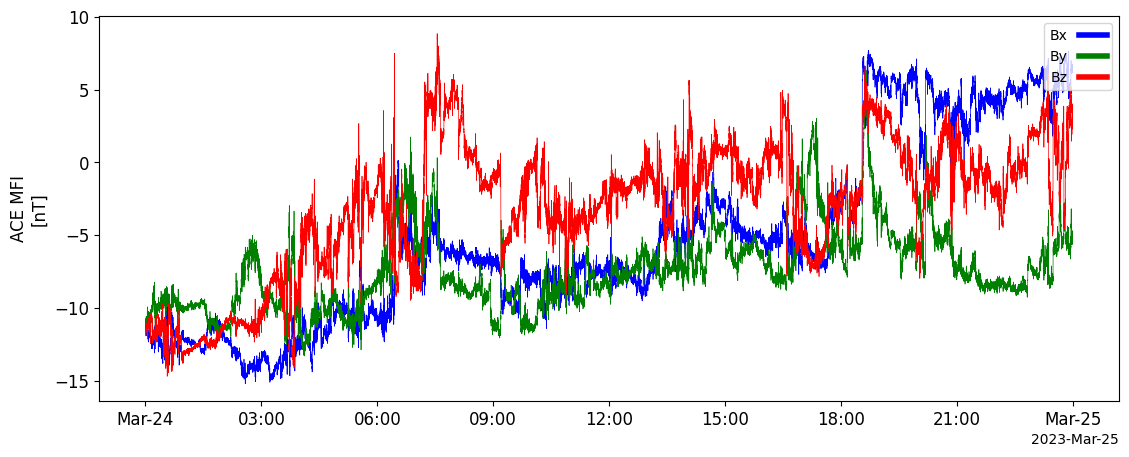

In [17]:
tplot(['BGSEc'])

## Deep Space Climate Observatory (DSCOVR)

The [Deep Space Climate Observatory](https://www.nesdis.noaa.gov/current-satellite-missions/currently-flying/dscovr-deep-space-climate-observatory), or DSCOVR, was launched in February of 2015, and maintains the nation's real-time solar wind monitoring capabilities, which are critical to the accuracy and lead time of NOAA's space weather alerts and forecasts. 

In [18]:
mag_vars = pyspedas.dscovr.mag(trange=trange)
orb_vars = pyspedas.dscovr.orb(trange=trange)

16-Apr-24 23:17:44: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/dscovr/h0/mag/2023/
16-Apr-24 23:17:44: File is current: dscovr_data/h0/mag/2023/dscovr_h0_mag_20230324_v01.cdf
16-Apr-24 23:17:45: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/dscovr/orbit/pre_or/2023/
16-Apr-24 23:17:46: File is current: dscovr_data/orbit/pre_or/2023/dscovr_orbit_pre_20230324_v04.cdf


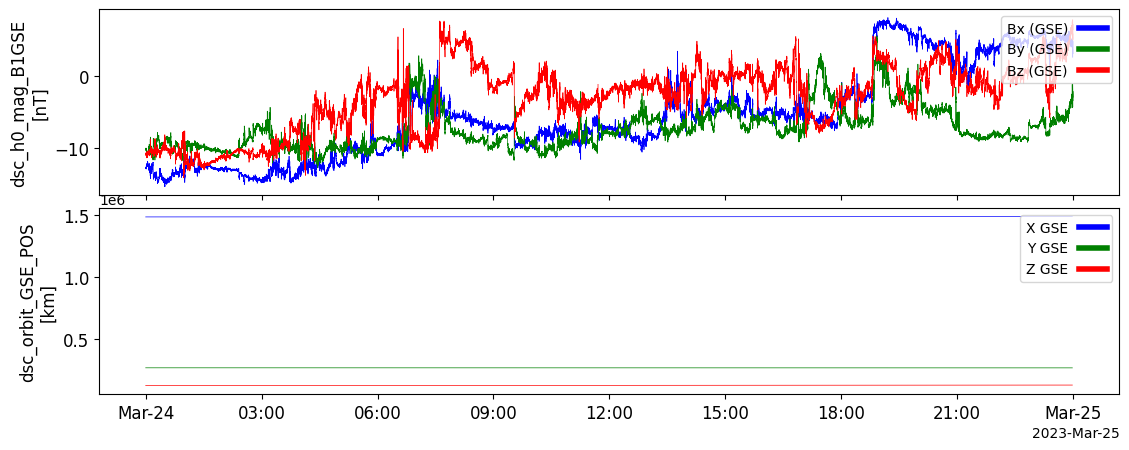

In [19]:
tplot(['dsc_h0_mag_B1GSE', 'dsc_orbit_GSE_POS'])

## Solar Terrestrial Relations Observatory (STEREO)

The [Solar TErrestrial RElations Observatory](https://www.nasa.gov/directorates/heo/scan/services/missions/solarsystem/STEREO.html) (STEREO) consists of two nearly identical spacecraft that seek to establish a one-to-one cause and effect relationship between coronal mass ejections as seen at the sun, the acceleration of particles in interplanetary space, and terrestrial consequences.

In [20]:
mag_vars = pyspedas.stereo.mag(trange=trange)
plastic_vars = pyspedas.stereo.plastic(trange=trange)

16-Apr-24 23:17:54: Downloading remote index: http://sprg.ssl.berkeley.edu/data/misc/stereo/impact/level1/ahead/mag/RTN/2023/03/
16-Apr-24 23:17:54: File is current: stereo_data/impact/level1/ahead/mag/RTN/2023/03/STA_L1_MAG_RTN_20230324_V06.cdf
16-Apr-24 23:18:01: Downloading remote index: http://stereo-ssc.nascom.nasa.gov/data/ins_data/plastic/level2/Protons/Derived_from_1D_Maxwellian/ahead/1min/2023/
16-Apr-24 23:18:02: File is current: stereo_data/plastic/level2/Protons/Derived_from_1D_Maxwellian/ahead/1min/2023/STA_L2_PLA_1DMax_1min_20230324_V11.cdf
16-Apr-24 23:18:02: proton_n_s_flow_angle_HERTN: lengths of x (1440) and y (1441) do not match! Mislabeled NRV variable?


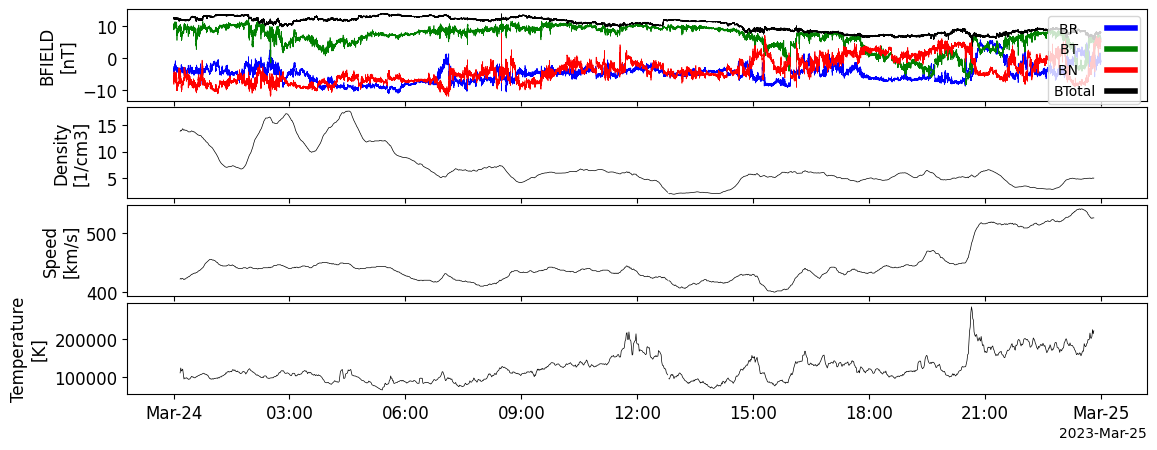

In [21]:
tplot(['BFIELD', 'proton_number_density', 'proton_bulk_speed', 'proton_temperature'])

## Mars Atmosphere and Volatile Evolution (MAVEN)

The [Mars Atmosphere and Volatile EvolutioN](https://www.nasa.gov/mission_pages/maven/overview/index.html) (MAVEN) mission is part of NASA's Mars Scout program. Launched in Nov. 2013, the mission explores the Red Planet’s upper atmosphere, ionosphere and interactions with the sun and solar wind.

In [22]:
mag_vars = pyspedas.maven.mag(trange=trange, spdf=True)
swe_vars = pyspedas.maven.swea(trange=trange, spdf=True)
swi_vars = pyspedas.maven.swia(trange=trange, spdf=True)

16-Apr-24 23:18:09: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/maven/mag/l2/sunstate-1sec/cdfs/2023/03/
16-Apr-24 23:18:09: File is current: maven/mag/l2/sunstate-1sec/cdfs/2023/03/mvn_mag_l2-sunstate-1sec_20230324_v01_r01.cdf
16-Apr-24 23:18:10: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/maven/swea/l2/svyspec/2023/03/
16-Apr-24 23:18:10: File is current: maven/swea/l2/svyspec/2023/03/mvn_swe_l2_svyspec_20230324_v04_r05.cdf
16-Apr-24 23:18:10: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/maven/swia/l2/onboardsvyspec/2023/03/
16-Apr-24 23:18:11: File is current: maven/swia/l2/onboardsvyspec/2023/03/mvn_swi_l2_onboardsvyspec_20230324_v02_r01.cdf


In [23]:
swi_vars

['spectra_diff_en_fluxes']

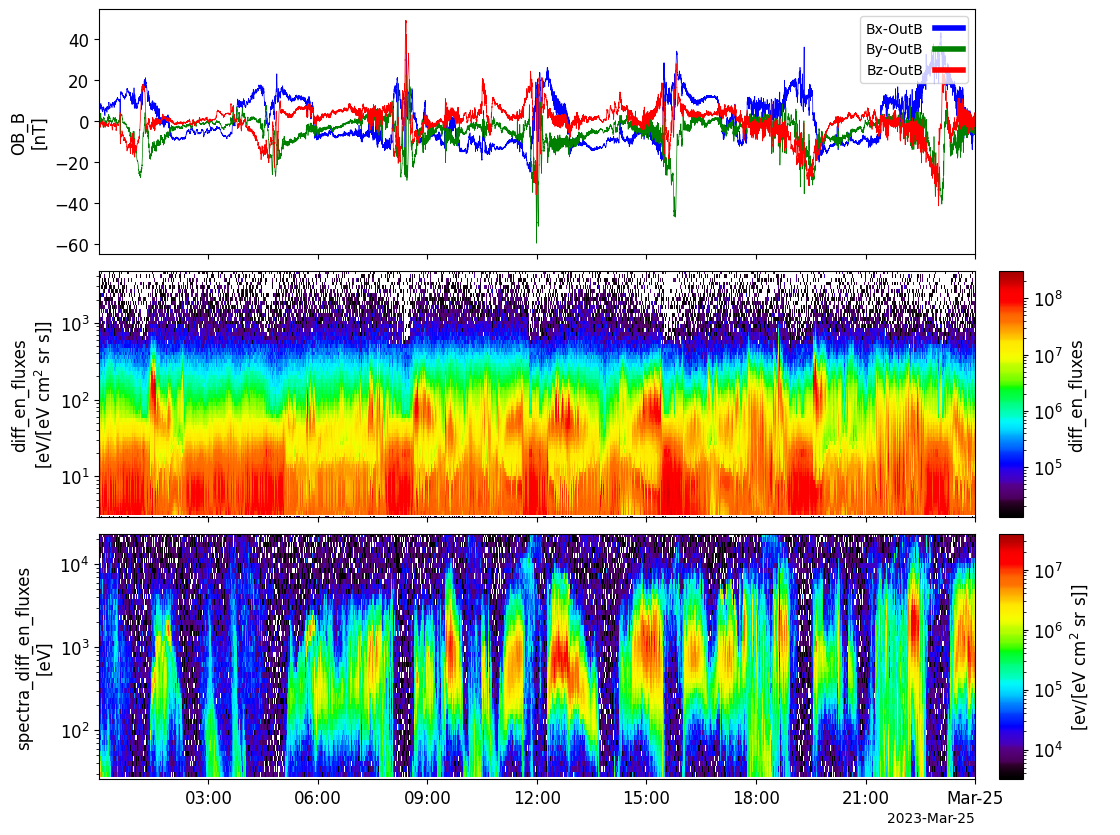

In [24]:
options('spectra_diff_en_fluxes', 'ylog', True)
options('spectra_diff_en_fluxes', 'zlog', True)
options('diff_en_fluxes', 'ylog', True)
options('diff_en_fluxes', 'zlog', True)
options('diff_en_fluxes', 'spec', True)

tplot(['OB_B', 'diff_en_fluxes', 'spectra_diff_en_fluxes'], ysize=10)

## OMNI 

Solar wind [magnetic field and plasma data](https://omniweb.gsfc.nasa.gov/index.html) at Earth's Bow Shock Nose (BSN), also geomagnetic activity indices and energetic proton fluxes.

In [25]:
omni_vars = pyspedas.omni.data(trange=['2023-03-01', '2023-04-01'], time_clip=False)

16-Apr-24 23:19:51: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro2_1min/2023/
16-Apr-24 23:19:52: File is current: omni_data/hro2_1min/2023/omni_hro2_1min_20230301_v01.cdf


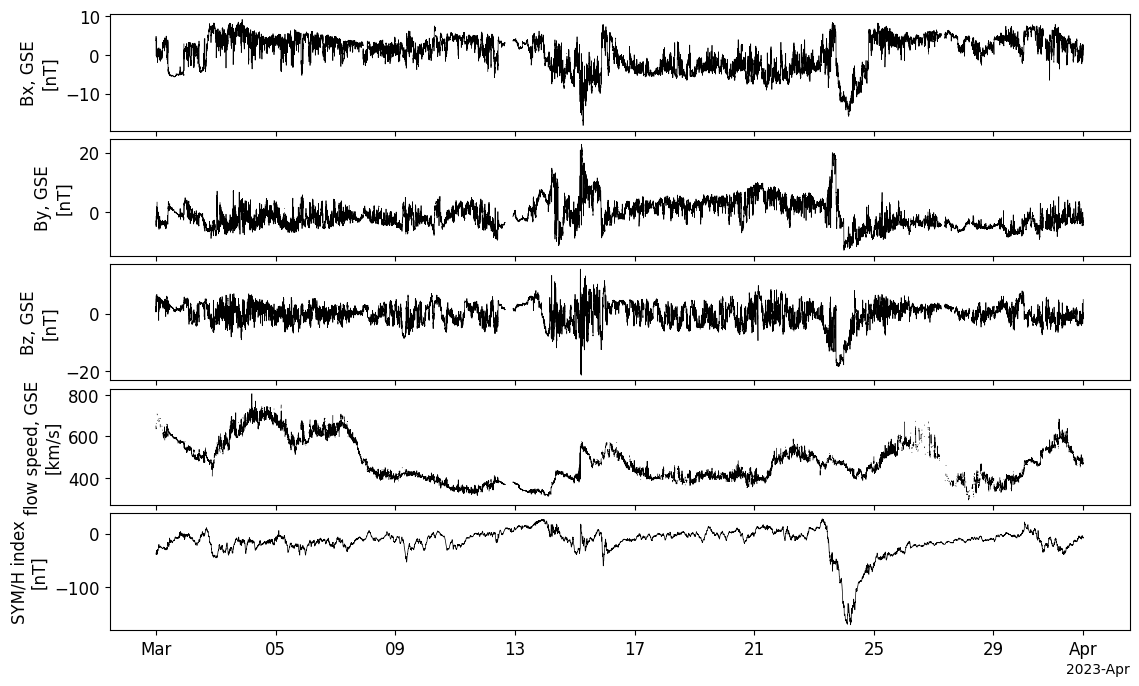

In [26]:
tplot(['BX_GSE', 'BY_GSE', 'BZ_GSE', 'flow_speed', 'SYM_H'])

## Kyoto Dst

The hourly Dst index, from the [WDC for Geomagnetism](https://wdc.kugi.kyoto-u.ac.jp/dstdir/), Kyoto, Japan; useful indicator of geomagnetic storm intensity

In [73]:
from pytplot import time_clip
dst_vars = pyspedas.kyoto.dst(trange=['2023-03-23', '2023-03-25'],time_clip=True)
time_clip('SYM_H',time_start='2023-03-23',time_end='2023-03-25')

16-Apr-24 23:49:08: **************************************************************************************
16-Apr-24 23:49:08: The DST data are provided by the World Data Center for Geomagnetism, Kyoto, and
16-Apr-24 23:49:08:  are not for redistribution (http://wdc.kugi.kyoto-u.ac.jp/). Furthermore, we thank
16-Apr-24 23:49:08:  the geomagnetic observatories (Kakioka [JMA], Honolulu and San Juan [USGS], Hermanus
16-Apr-24 23:49:08:  [RSA], Alibag [IIG]), NiCT, INTERMAGNET, and many others for their cooperation to
16-Apr-24 23:49:08:  make the Dst index available.
16-Apr-24 23:49:08: **************************************************************************************


['SYM_H-tclip']

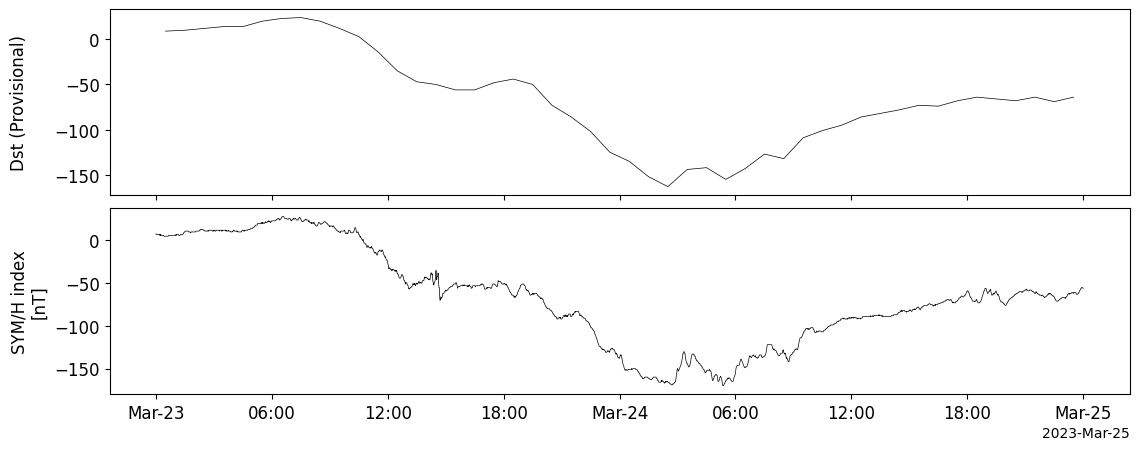

In [74]:
tplot(['kyoto_dst', 'SYM_H-tclip'])

## Magnetospheric Multiscale (MMS)

The [Magnetospheric Multiscale](https://mms.gsfc.nasa.gov/) (MMS) mission studies the mystery of how magnetic fields around Earth connect and disconnect, explosively releasing energy via a process known a magnetic reconnection.

In [30]:
mec_vars = pyspedas.mms.mec(trange=trange)
fgm_vars = pyspedas.mms.fgm(trange=trange)
feeps_vars = pyspedas.mms.feeps(trange=trange)

16-Apr-24 23:21:50: Loading pydata/mms1/mec/srvy/l2/epht89q/2023/03/mms1_mec_srvy_l2_epht89q_20230324_v2.2.0.cdf
16-Apr-24 23:21:51: Loaded variables:
16-Apr-24 23:21:51: mms1_mec_dipole_tilt
16-Apr-24 23:21:51: mms1_mec_gmst
16-Apr-24 23:21:51: mms1_mec_mlat
16-Apr-24 23:21:51: mms1_mec_mlt
16-Apr-24 23:21:51: mms1_mec_l_dipole
16-Apr-24 23:21:51: mms1_mec_quat_eci_to_bcs
16-Apr-24 23:21:51: mms1_mec_quat_eci_to_dbcs
16-Apr-24 23:21:51: mms1_mec_quat_eci_to_dmpa
16-Apr-24 23:21:51: mms1_mec_quat_eci_to_smpa
16-Apr-24 23:21:51: mms1_mec_quat_eci_to_dsl
16-Apr-24 23:21:51: mms1_mec_quat_eci_to_ssl
16-Apr-24 23:21:51: mms1_mec_L_vec
16-Apr-24 23:21:51: mms1_mec_Z_vec
16-Apr-24 23:21:51: mms1_mec_P_vec
16-Apr-24 23:21:51: mms1_mec_L_phase
16-Apr-24 23:21:51: mms1_mec_Z_phase
16-Apr-24 23:21:51: mms1_mec_P_phase
16-Apr-24 23:21:51: mms1_mec_kp
16-Apr-24 23:21:51: mms1_mec_dst
16-Apr-24 23:21:51: mms1_mec_earth_eclipse_flag
16-Apr-24 23:21:51: mms1_mec_moon_eclipse_flag
16-Apr-24 23:21:51: 

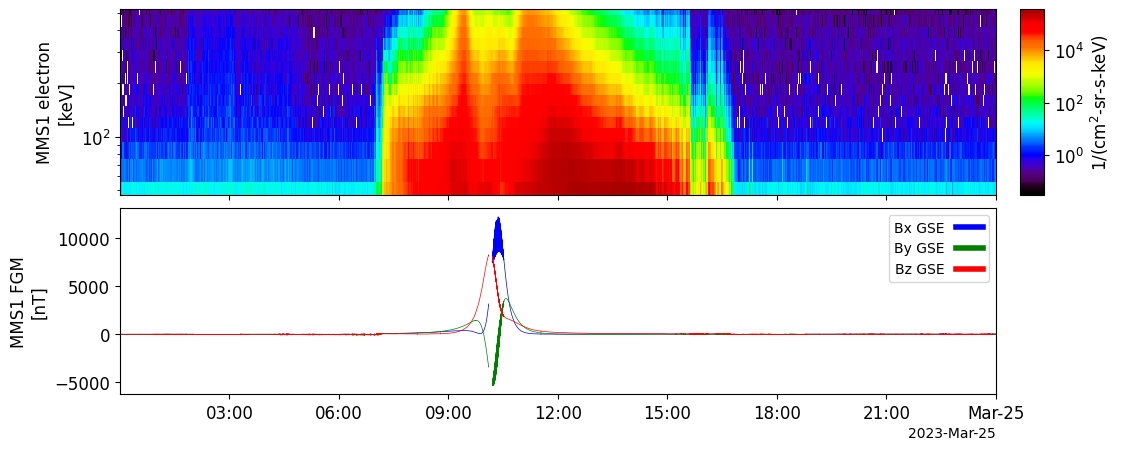

In [31]:
tplot(['mms1_epd_feeps_srvy_l2_electron_intensity_omni',
       'mms1_fgm_b_gse_srvy_l2_bvec'])

16-Apr-24 23:22:42: Loading pydata/mms1/hpca/srvy/l2/ion/2023/03/mms1_hpca_srvy_l2_ion_20230323060000_v4.3.4.cdf
16-Apr-24 23:22:49: Loaded variables:
16-Apr-24 23:22:49: Epoch
16-Apr-24 23:22:49: Epoch_MINUS
16-Apr-24 23:22:49: Epoch_PLUS
16-Apr-24 23:22:49: mms1_hpca_polar_anode_number
16-Apr-24 23:22:49: mms1_hpca_azimuth_decimation_factor
16-Apr-24 23:22:49: mms1_hpca_polar_decimation_factor
16-Apr-24 23:22:49: mms1_hpca_energy_decimation_factor
16-Apr-24 23:22:49: mms1_hpca_sweep_table_number
16-Apr-24 23:22:49: mms1_hpca_start_azimuth
16-Apr-24 23:22:49: mms1_hpca_science_mode
16-Apr-24 23:22:49: mms1_hpca_ion_energy
16-Apr-24 23:22:49: mms1_hpca_hplus_flux
16-Apr-24 23:22:49: mms1_hpca_hplus_phase_space_density
16-Apr-24 23:22:49: mms1_hpca_heplus_flux
16-Apr-24 23:22:49: mms1_hpca_heplus_phase_space_density
16-Apr-24 23:22:49: mms1_hpca_heplusplus_flux
16-Apr-24 23:22:49: mms1_hpca_heplusplus_phase_space_density
16-Apr-24 23:22:49: mms1_hpca_oplus_flux
16-Apr-24 23:22:49: mms1_

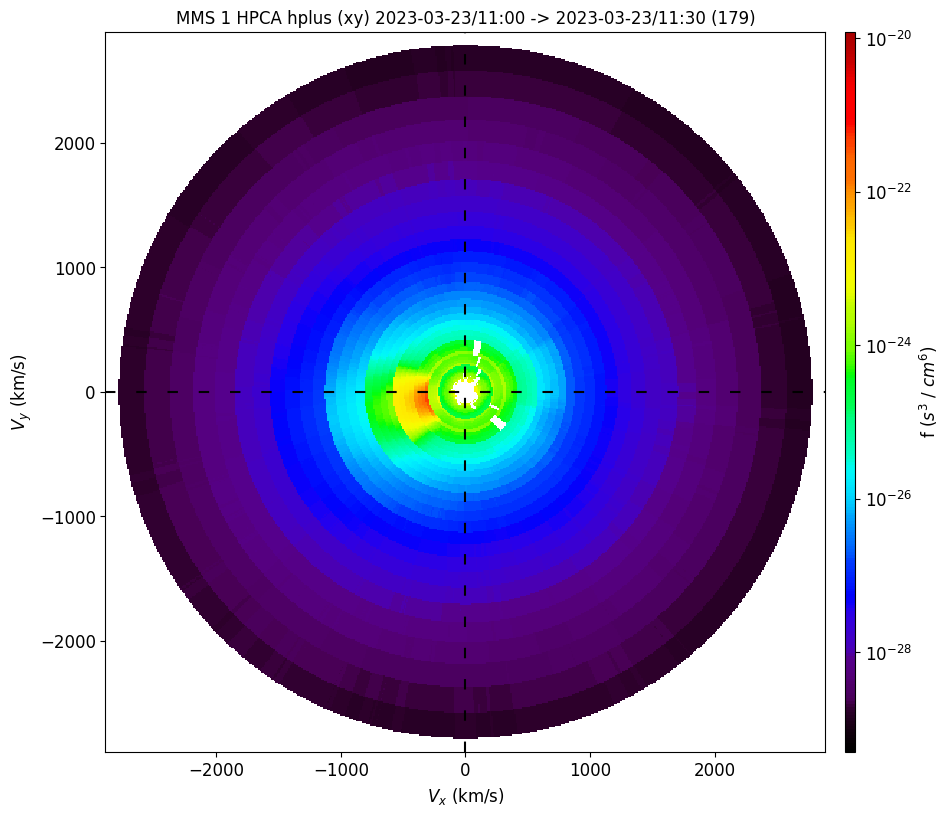

In [32]:
from pyspedas.mms.particles.mms_part_slice2d import mms_part_slice2d

mms_part_slice2d(trange=['2023-03-23/11:00', '2023-03-23/11:30'], instrument='hpca', species='hplus')

## Time History of Events and Macroscale Interactions during Substorms (THEMIS)

The [Time History of Events and Macroscale Interactions during Substorms](https://www.nasa.gov/mission_pages/themis/mission/index.html) —THEMIS — mission studies how mass and energy move through the near-Earth environment in order to determine the physical processes initiating auroras.

In [39]:
sta_vars = pyspedas.themis.state(probe='d', trange=trange)
fgm_vars = pyspedas.themis.fgm(probe='d', trange=trange)
gmom_vars = pyspedas.themis.gmom(probe='d', trange=trange)

16-Apr-24 23:29:08: File is current: themis_data/thd/l1/state/2023/thd_l1_state_20230324.cdf
16-Apr-24 23:29:09: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/thd/l2/fgm/2023/
16-Apr-24 23:29:09: File is current: themis_data/thd/l2/fgm/2023/thd_l2_fgm_20230324_v01.cdf
16-Apr-24 23:29:09: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/thd/l2/gmom/2023/
16-Apr-24 23:29:09: File is current: themis_data/thd/l2/gmom/2023/thd_l2_gmom_20230324_v01.cdf


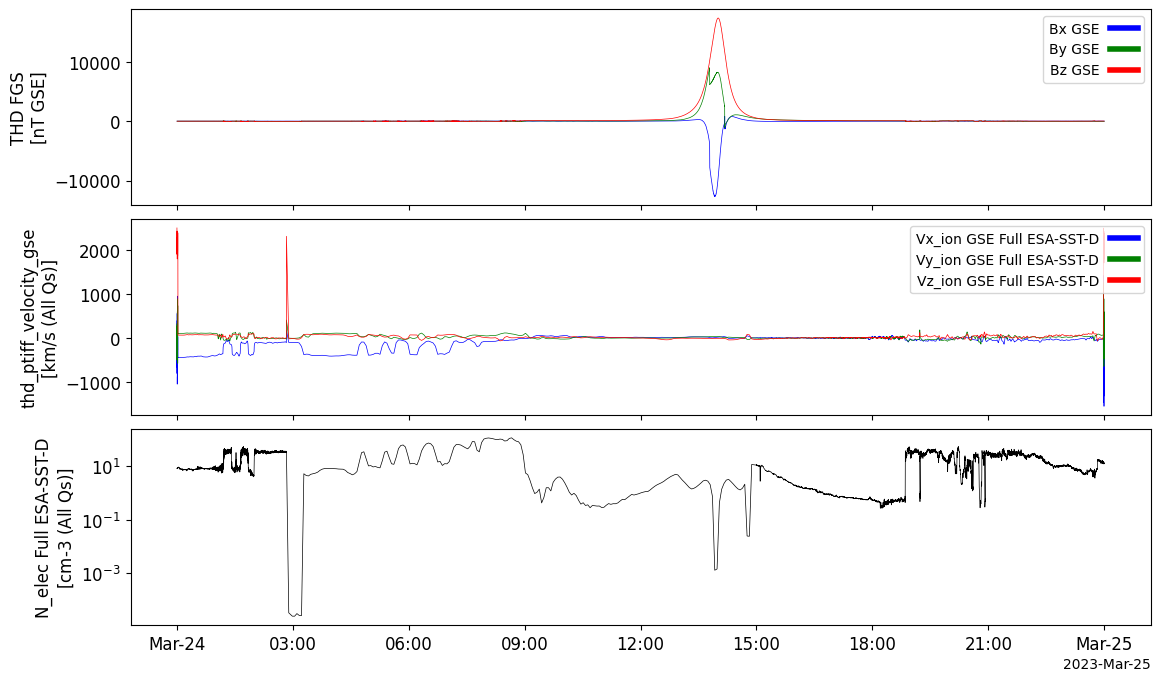

In [40]:
tplot(['thd_fgs_gse', 'thd_ptiff_velocity_gse', 'thd_pteff_density'], ysize=8)

## Arase

The [Arase](https://global.jaxa.jp/projects/sas/erg/) mission aims at elucidating how highly charged electrons have been born while they generate and vanish repeatedly along with space storms caused by the disturbance of solar wind caused by space storms, and how space storms are developed.



In [41]:
pyspedas.erg.orb(trange=trange)
pyspedas.erg.mgf(trange=trange)
pyspedas.erg.mepe(trange=trange)
pyspedas.erg.lepe(trange=trange)

16-Apr-24 23:29:36: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/orb/def/2023/
16-Apr-24 23:29:38: File is current: erg_data/satellite/erg/orb/def/2023/erg_orb_l2_20230324_v04.cdf
16-Apr-24 23:29:38: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2023/03/


 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data']

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


16-Apr-24 23:29:39: File is current: erg_data/satellite/erg/mgf/l2/8sec/2023/03/erg_mgf_l2_8sec_20230324_v04.04.cdf
16-Apr-24 23:29:39: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mepe/l2/omniflux/2023/03/


 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data']

Information about ERG MGF

PI:  ['Ayako Matsuoka']
Affiliation:  ['Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan']

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


16-Apr-24 23:29:40: File is current: erg_data/satellite/erg/mepe/l2/omniflux/2023/03/erg_mepe_l2_omniflux_20230324_v01_02.cdf
16-Apr-24 23:29:40: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/lepe/l2/omniflux/2023/03/


 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Medium Energy Particle experiments - electron analyzer (MEP-e) electron omni flux data']

PI:  ['Satoshi Kasahara']
Affiliation:  ['The University of Tokyo']

- The rules of the road (RoR) common to the ERG project:
      https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
- RoR for MEP-e data:  https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mepe

Contact: erg_mep_info at isee.nagoya-u.ac.jp
**************************************************************************


16-Apr-24 23:29:40: File is current: erg_data/satellite/erg/lepe/l2/omniflux/2023/03/erg_lepe_l2_omniflux_20230324_v04_01.cdf


 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Low-Energy Particle experiments - electron analyzer (LEP-e) Level 2 omni electron flux data']

Information about ERG LEPe

PI:  ['Shiang-Yu Wang']
Affiliation:  ['Academia Sinica, Taiwan']

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of LEPe L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Lepe

Contact: erg_lepe_info at isee.nagoya-u.ac.jp
**************************************************************************


['erg_lepe_l2_omniflux_FEDO']

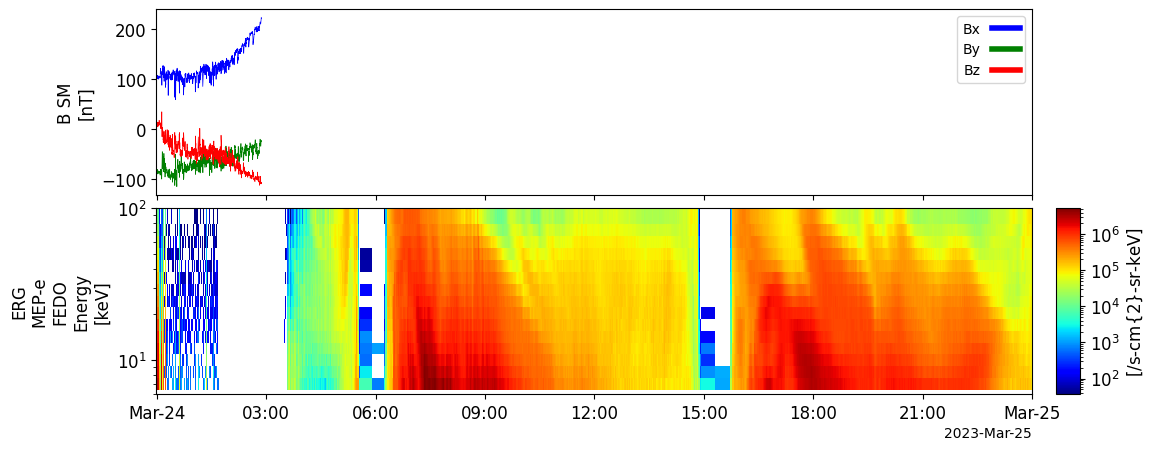

In [42]:
tplot(['erg_mgf_l2_mag_8sec_sm', 
       'erg_mepe_l2_omniflux_FEDO'])

## Geopack (Tsyganenko field models)

In [43]:
from pyspedas.geopack import tt89

Load IGRF coefficients ...


In [44]:
# convert the Arase position data to km (from Re)
from pyspedas import tkm2re
tkm2re('erg_orb_l2_pos_gsm', km=True)

tt89('mms1_mec_r_gsm')
tt89('thd_pos_gsm')
tt89('erg_orb_l2_pos_gsm_km')

'erg_orb_l2_pos_gsm_km_bt89'

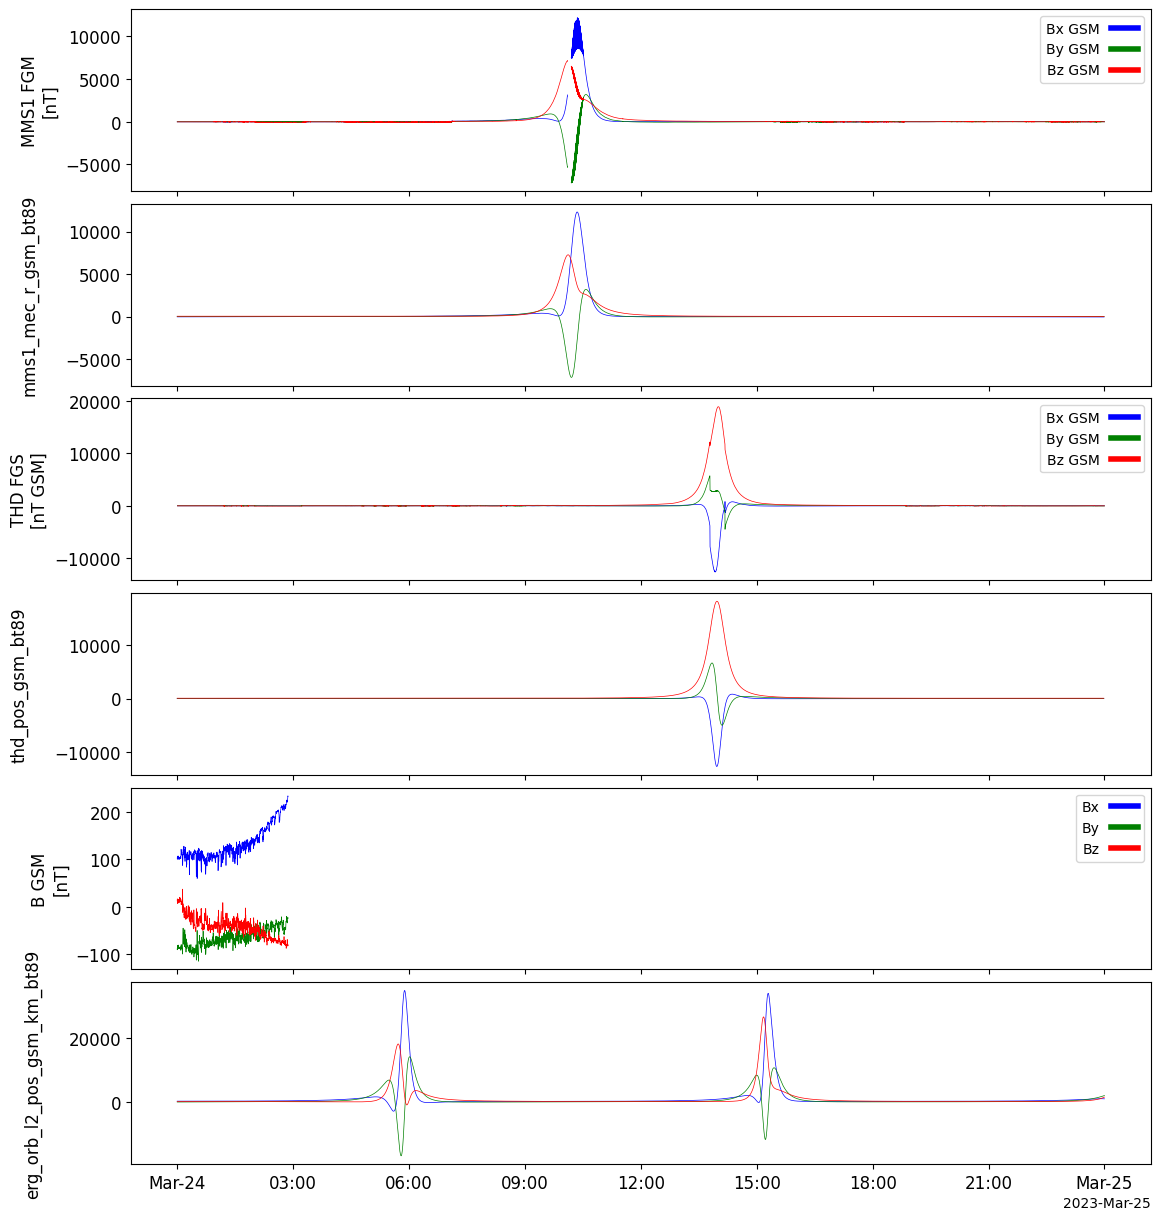

In [45]:
tplot(['mms1_fgm_b_gsm_srvy_l2_bvec', # MMS measured field
       'mms1_mec_r_gsm_bt89', # T89 at the MMS1 position
       'thd_fgs_gsm', # THEMIS measured field
       'thd_pos_gsm_bt89', # T89 at the THEMIS-c position
       'erg_mgf_l2_mag_8sec_gsm', # ERG measured field
       'erg_orb_l2_pos_gsm_km_bt89'], ysize=15) # T89 at the ERG position

## Polar Operational Environmental Satellites (POES)

In [46]:
sem_vars = pyspedas.poes.sem(trange=['2023-03-24', '2023-03-25'])

16-Apr-24 23:30:48: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/noaa/noaa19/sem2_fluxes-2sec/2023/
16-Apr-24 23:30:48: File is current: poes_data/noaa19/sem2_fluxes-2sec/2023/noaa19_poes-sem2_fluxes-2sec_20230324_v01.cdf


In [47]:
options('ted_pro_tel0_low_eflux', 'ylog', False)
options('ted_pro_tel30_low_eflux', 'ylog', False)

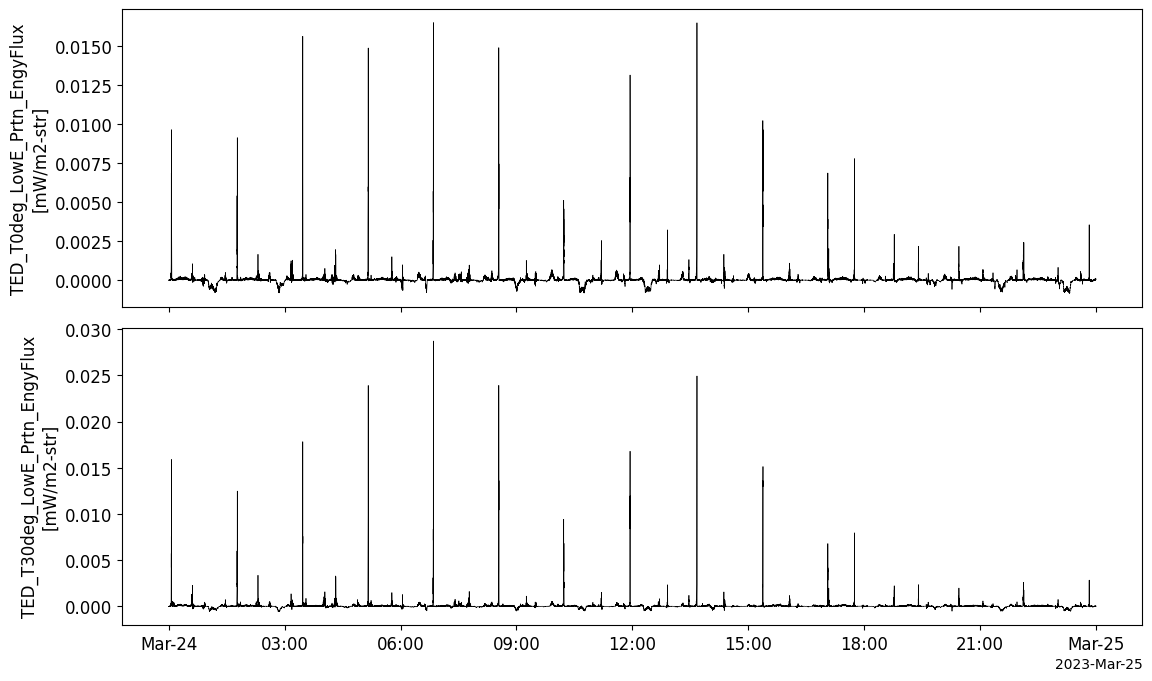

In [48]:
from pytplot import tplot
tplot('ted_pro_tel*_low_eflux', ysize=8)

## Swarm

In [49]:
swarm_vars = pyspedas.swarm.mag(trange=['2023-03-24/06:00', '2023-03-24/08:00'])

16-Apr-24 23:31:53: /Users/jwl/PycharmProjects/pyspedas_examples/venv/lib/python3.9/site-packages/pytplot/MPLPlotter/tplot.py:702: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  out_ticks.append('{:.2f}'.format(var_xr.interp(coords={'time': time}, kwargs={'fill_value': 'extrapolate', 'bounds_error': False}).values))

16-Apr-24 23:31:53: /Users/jwl/PycharmProjects/pyspedas_examples/venv/lib/python3.9/site-packages/pytplot/MPLPlotter/tplot.py:702: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, 

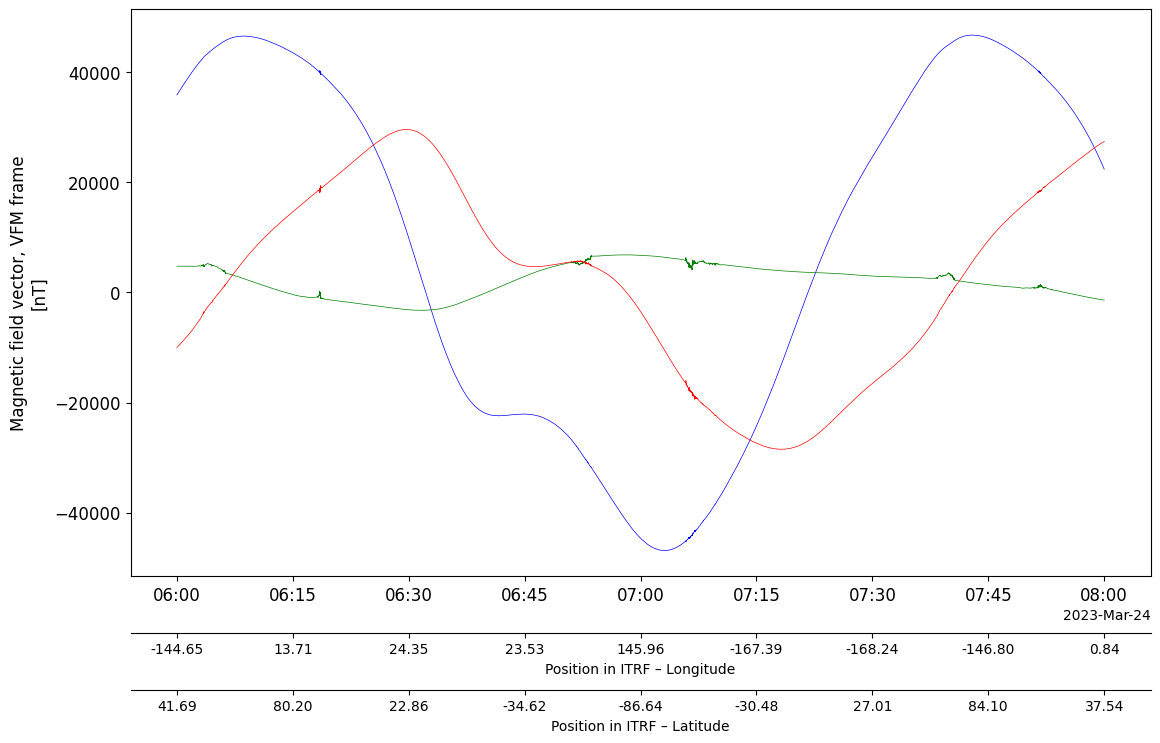

In [50]:
tplot('swarma_B_VFM', var_label=['swarma_Longitude', 'swarma_Latitude'], ysize=9)

## All Sky Imager data

In [53]:
ask_vars = pyspedas.themis.ask(trange=trange)

16-Apr-24 23:33:11: Downloading http://themis.ssl.berkeley.edu/data/themis/thg/l1/asi/ask/2023/thg_l1_ask_20230324_v01.cdf to themis_data/thg/l1/asi/ask/2023/thg_l1_ask_20230324_v01.cdf
16-Apr-24 23:33:33: Download complete: themis_data/thg/l1/asi/ask/2023/thg_l1_ask_20230324_v01.cdf


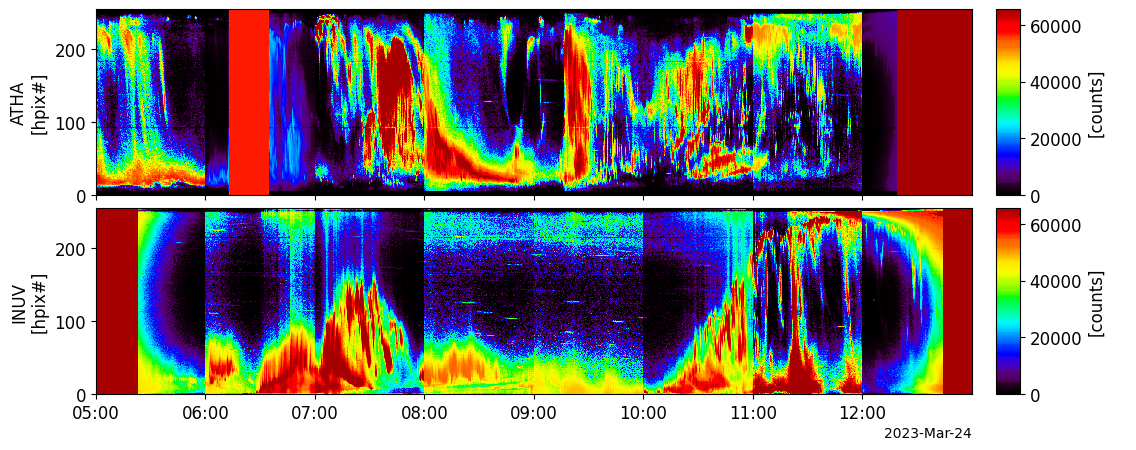

In [55]:
tplot(['thg_ask_atha', 'thg_ask_inuv'])

## Ground magnetometer data

In [56]:
pyspedas.themis.gmag(trange=trange)

16-Apr-24 23:34:21: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/thg/l1/mag/idx/2023/
16-Apr-24 23:34:21: Downloading http://themis.ssl.berkeley.edu/data/themis/thg/l1/mag/idx/2023/thg_l1_idx_20230324_v01.cdf to themis_data/thg/l1/mag/idx/2023/thg_l1_idx_20230324_v01.cdf
16-Apr-24 23:34:21: Download complete: themis_data/thg/l1/mag/idx/2023/thg_l1_idx_20230324_v01.cdf
16-Apr-24 23:34:21: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/thg/l2/mag/atha/2023/
16-Apr-24 23:34:21: Downloading http://themis.ssl.berkeley.edu/data/themis/thg/l2/mag/atha/2023/thg_l2_mag_atha_20230324_v01.cdf to themis_data/thg/l2/mag/atha/2023/thg_l2_mag_atha_20230324_v01.cdf
16-Apr-24 23:34:22: Download complete: themis_data/thg/l2/mag/atha/2023/thg_l2_mag_atha_20230324_v01.cdf
16-Apr-24 23:34:22: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/thg/l2/mag/chbg/2023/
16-Apr-24 23:34:22: No links matching pattern thg_l2_mag_chbg_20230324_v??.cdf f

['thg_mag_and',
 'thg_mag_bfe',
 'thg_mag_bjn',
 'thg_mag_dmh',
 'thg_mag_dob',
 'thg_mag_don',
 'thg_mag_fhb',
 'thg_mag_gdh',
 'thg_mag_hov',
 'thg_mag_jan',
 'thg_mag_jck',
 'thg_mag_kar',
 'thg_mag_kuv',
 'thg_mag_lyr',
 'thg_mag_nal',
 'thg_mag_naq',
 'thg_mag_nor',
 'thg_mag_roe',
 'thg_mag_rvk',
 'thg_mag_skt',
 'thg_mag_sol',
 'thg_mag_sor',
 'thg_mag_stf',
 'thg_mag_sum',
 'thg_mag_svs',
 'thg_mag_tab',
 'thg_mag_thl',
 'thg_mag_tro',
 'thg_mag_umq',
 'thg_mag_upn',
 'thg_idx_al',
 'thg_idx_au',
 'thg_idx_ae',
 'thg_idx_uc_al',
 'thg_idx_uc_au',
 'thg_idx_uc_ae',
 'thg_idx_uc_avg',
 'thg_mag_atha',
 'thg_mag_blc',
 'thg_mag_cbb',
 'thg_mag_cdrt',
 'thg_mag_chbr',
 'thg_mag_fsim',
 'thg_mag_fsmi',
 'thg_mag_fykn',
 'thg_mag_gako',
 'thg_mag_gill',
 'thg_mag_gjoa',
 'thg_mag_iglo',
 'thg_mag_inuk',
 'thg_mag_iqa',
 'thg_mag_kian',
 'thg_mag_kuuj',
 'thg_mag_leth',
 'thg_mag_mea',
 'thg_mag_nain',
 'thg_mag_ott',
 'thg_mag_pang',
 'thg_mag_pgeo',
 'thg_mag_pina',
 'thg_mag_pokr',

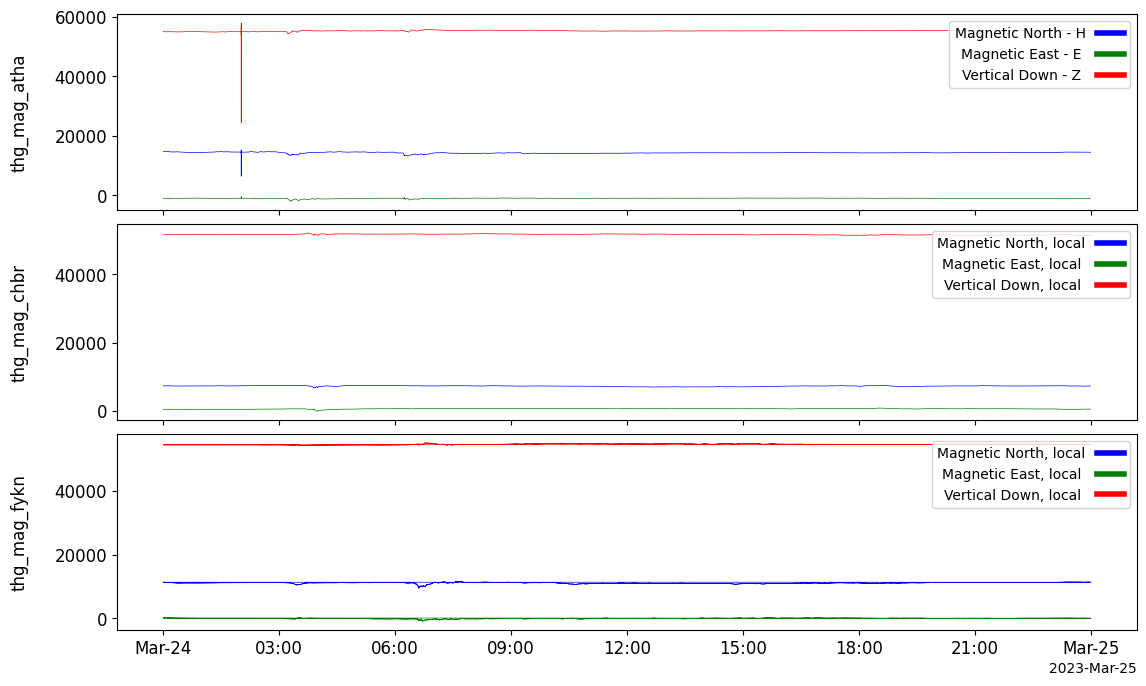

In [58]:
tplot(['thg_mag_atha', 'thg_mag_chbr', 'thg_mag_fykn'], ysize=8)

Subtract the median from the ground mag data

In [59]:
from pyspedas import subtract_median

subtract_median(['thg_mag_atha', 'thg_mag_chbr', 'thg_mag_fykn'])

16-Apr-24 23:37:52: Subtract Median was applied to: thg_mag_atha-m
16-Apr-24 23:37:52: Subtract Median was applied to: thg_mag_chbr-m
16-Apr-24 23:37:52: Subtract Median was applied to: thg_mag_fykn-m


['thg_mag_atha-m', 'thg_mag_chbr-m', 'thg_mag_fykn-m']

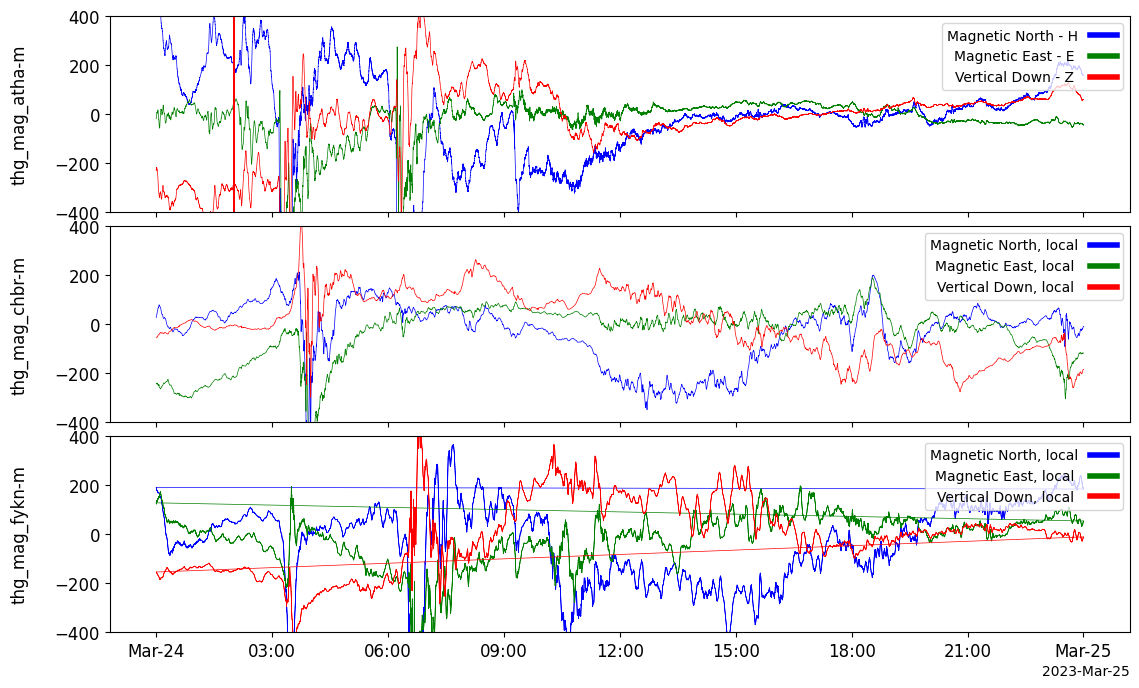

In [62]:
options('thg_mag_atha-m', 'yrange', [-400, 400])
options('thg_mag_chbr-m', 'yrange', [-400, 400])
options('thg_mag_fykn-m', 'yrange', [-400, 400])

tplot(['thg_mag_atha-m', 'thg_mag_chbr-m', 'thg_mag_fykn-m'], ysize=8)

## Resources

### PyTplot Basics
- [Introduction to PyTplot](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/Introduction_to_PyTplot.ipynb)

### Loading Data
- [MMS examples](https://github.com/spedas/mms-examples/tree/master/basic)
- [THEMIS examples](https://github.com/spedas/themis-examples/tree/main/basic)
- [Load data from HAPI servers](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/PySPEDAS_loading_data_from_HAPI_servers.ipynb)

### Plotting Data
- [Annotations](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/PyTplot_annotations.ipynb)
- [Range options](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/PyTplot_range_options.ipynb)
- [Spectrogram options](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/PyTplot_spectrogram_options.ipynb)
- [Legend options](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/PyTplot_legend_options.ipynb)
- [Markers and symbols](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/PyTplot_markers_and_symbols.ipynb)
- [Error bars](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/PyTplot_error_bars.ipynb)
- [Pseudo variables](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/PyTplot_pseudo_variables.ipynb)
- [Highlight intervals and vertical bars](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/PyTplot_highlight_intervals_and_vertical_bars.ipynb)

### Dates and Times
- [Working with dates and times](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/Working_with_dates_and_times_with_PySPEDAS_PyTplot.ipynb)

### Coordinate Transformations
- [Coordinate transformations](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/Coordinate_transformations_with_OMNI_data.ipynb)
- [Boundary normal (LMN) coordinates](https://github.com/spedas/mms-examples/blob/master/advanced/MMS_LMN_coordinate_transformation.ipynb)
- [Quaternion transformations with SpacePy](https://github.com/spedas/mms-examples/blob/master/basic/MMS_quaternion_coordinate_transformations.ipynb)

### Analysis
- [Plasma calculations with PlasmaPy](https://github.com/spedas/mms-examples/blob/master/advanced/Plasma%20calculations%20with%20PlasmaPy.ipynb)
- [Poynting flux with MMS data](https://github.com/spedas/mms-examples/blob/master/advanced/Poynting_flux_with_MMS_data.ipynb)
- [Plasma beta with MMS data](https://github.com/spedas/mms-examples/blob/master/basic/Plasma%20Beta%20with%20FGM%20and%20FPI%20data.ipynb) (note: the PlasmaPy notebook above shows a much easier method)
- [Curlometer calculations](https://github.com/spedas/mms-examples/blob/master/basic/Curlometer%20Technique.ipynb)
- [Neutral sheet models](https://github.com/spedas/mms-examples/blob/master/advanced/MMS_neutral_sheet_models.ipynb)
- [Wave polarization calculations](https://github.com/spedas/mms-examples/blob/master/advanced/Wave_polarization_using_SCM_data.ipynb)
- [Dynamic power spectra calculations](https://github.com/spedas/mms-examples/blob/master/basic/Search-coil%20Magnetometer%20(SCM).ipynb)
- [2D slices of MMS distribution functions](https://github.com/spedas/mms-examples/blob/master/advanced/Generate_2D_slices_of_FPI_and_HPCA_data.ipynb)
- [Generating spectrograms and moments from MMS distribution functions](https://github.com/spedas/mms-examples/blob/master/advanced/Generate%20spectrograms%20and%20moments%20with%20mms_part_getspec.ipynb)


### Documentation
- [Advanced Composition Explorer (ACE)](https://pyspedas.readthedocs.io/en/latest/ace.html)
- [Akebono](https://pyspedas.readthedocs.io/en/latest/akebono.html)
- [Arase (ERG)](https://pyspedas.readthedocs.io/en/latest/erg.html)
- [Cluster](https://pyspedas.readthedocs.io/en/latest/cluster.html)
- [Colorado Student Space Weather Experiment (CSSWE)](https://pyspedas.readthedocs.io/en/latest/csswe.html)
- [Communications/Navigation Outage Forecasting System (C/NOFS)](https://pyspedas.readthedocs.io/en/latest/cnofs.html)
- [Deep Space Climate Observatory (DSCOVR)](https://pyspedas.readthedocs.io/en/latest/dscovr.html)
- [Dynamics Explorer 2 (DE2)](https://pyspedas.readthedocs.io/en/latest/de2.html)
- [Equator-S](https://pyspedas.readthedocs.io/en/latest/equator-s.html)
- [Fast Auroral Snapshot Explorer (FAST)](https://pyspedas.readthedocs.io/en/latest/fast.html)
- [Geotail](https://pyspedas.readthedocs.io/en/latest/geotail.html)
- [Geostationary Operational Environmental Satellite (GOES)](https://pyspedas.readthedocs.io/en/latest/goes.html)
- [Imager for Magnetopause-to-Aurora Global Exploration (IMAGE)](https://pyspedas.readthedocs.io/en/latest/image.html)
- [Kyoto Dst Index](https://pyspedas.readthedocs.io/en/latest/kyoto.html)
- [LANL](https://pyspedas.readthedocs.io/en/latest/lanl.html)
- [Mars Atmosphere and Volatile Evolution (MAVEN)](https://pyspedas.readthedocs.io/en/latest/maven.html)
- [Magnetic Induction Coil Array (MICA)](https://pyspedas.readthedocs.io/en/latest/mica.html)
- [Magnetospheric Multiscale (MMS)](https://pyspedas.readthedocs.io/en/latest/mms.html)
- [OMNI](https://pyspedas.readthedocs.io/en/latest/omni.html)
- [Polar Orbiting Environmental Satellites (POES)](https://pyspedas.readthedocs.io/en/latest/poes.html)
- [Polar](https://pyspedas.readthedocs.io/en/latest/polar.html)
- [Parker Solar Probe (PSP)](https://pyspedas.readthedocs.io/en/latest/psp.html)
- [Solar & Heliospheric Observatory (SOHO)](https://pyspedas.readthedocs.io/en/latest/soho.html)
- [Solar Orbiter (SOLO)](https://pyspedas.readthedocs.io/en/latest/solo.html)
- [Solar Terrestrial Relations Observatory (STEREO)](https://pyspedas.readthedocs.io/en/latest/stereo.html)
- [Space Technology 5 (ST5)](https://pyspedas.readthedocs.io/en/latest/st5.html)
- [Spherical Elementary Currents (SECS)](https://github.com/spedas/pyspedas/blob/master/pyspedas/secs/README.md)
- [Swarm](https://github.com/spedas/pyspedas/blob/master/pyspedas/swarm/README.md)
- [Time History of Events and Macroscale Interactions during Substorms (THEMIS)](https://pyspedas.readthedocs.io/en/latest/themis.html)
- [Two Wide-Angle Imaging Neutral-Atom Spectrometers (TWINS)](https://pyspedas.readthedocs.io/en/latest/twins.html)
- [Ulysses](https://pyspedas.readthedocs.io/en/latest/ulysses.html)
- [Van Allen Probes (RBSP)](https://pyspedas.readthedocs.io/en/latest/rbsp.html)
- [Wind](https://pyspedas.readthedocs.io/en/latest/wind.html)